# ДАП экзамен 

Время выполнения заданий — 2 часа (11:10 — 13:10). Жёсткий дедлайн загрузки файлов - 13:20. Экзамен включает в себя 3 обязательных задания и одно бонусное подзадание. Ответ на кодовую фразу не оценивается.   

Уточнения условия, если они будут, появятся в нашем канале. __Мы живем в сумрачном мире.__

__Ответ на кодовую фразу:__

На закате нет друзей

## Exercise 1 [20 баллов] ("eeeeeee")

На вход поступает непустая строка. Вам нужно посчитать максимальную длину последователости состоящей только из буквы "e" (русская буква).

__Примеры:__

```
eee_func("е ее еее") -> 3
eee_func("е ее еее") -> 3
eee_func("экзамен ееееее") -> 6
eee_func("праздники ееееееeeee") -> 10
eee_func("экзамен ееееее, а потом праздники ееееееeeee") -> 10
```


In [13]:
def eee_func(text):
    c = 0
    maxi = 0
    for i in text.split():
        for j in i:
            if j == "е" or j == "e":
                c += 1
            else:
                break
        if maxi < c:
            maxi = c
        c = 0
    return maxi

Если вы написали функцию правильно, она пройдёт тесты ниже без ошибок. Если ваша функция прошла все тесты, это не означает, что она написана правильно. 

In [14]:
assert eee_func("е") == 1, "Test 1 Failed"
assert eee_func("е ее еее") == 3, "Test 2 Failed"
assert eee_func("экзамен ееееее") == 6, "Test 3 Failed"
assert eee_func("праздники ееееееееее") == 10, "Test 4 Failed"
assert eee_func("экзамен ееееее, а потом праздники ееееееееее") == 10, "Test 5 Failed"

print("OK. Good Job! Eeeee!")

OK. Good Job! Eeeee!


## Extrasize 2 [40 баллов] (учим других)

Перед вами данные с оценками различных приложений. Ваша задача - построить модель, которая сможет прогнозировать будет ли приложение обладать высоким рейтингом.

__Примечание:__ если данные не парсятся с гита, просто перейдите по ссылке и скачайте табличку на свой компьютер.

In [15]:
import pandas as pd 

url = "https://raw.githubusercontent.com/FUlyankin/ML_for_marketing/master/drafts/drafts/AppleStore.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


__а)__ оставьте в данных колонки `["price", "user_rating", "prime_genre", "lang.num", "size_bytes"]`

In [19]:
df= df[["price", "user_rating", "prime_genre", "lang.num", "size_bytes"]]
df

,price,user_rating,prime_genre,lang.num,size_bytes
1,3.99,4.0,Games,10,100788224
2,0.00,4.0,Productivity,23,158578688
3,0.00,3.5,Weather,3,100524032
4,0.00,4.0,Shopping,9,128512000
5,0.00,4.5,Reference,45,92774400
...,...,...,...,...,...
11081,0.00,4.5,Games,1,126644224
11082,0.00,4.5,Games,1,120760320
11087,1.99,4.5,Utilities,1,111322112
11089,0.00,4.5,Games,2,97235968


__б)__ на базе колонки `user_rating` создайте колонку `is_popular`, запишите туда $1$, если рейтинг приложения больше 4. Иначе запишите 0. Колонку `user_rating` удалите. 

In [21]:
import numpy as np

In [22]:
df["is_popular"]= np.array([1 if i > 4 else 0 for i in df["user_rating"]])
df

,price,user_rating,prime_genre,lang.num,size_bytes,is_popular
1,3.99,4.0,Games,10,100788224,0
2,0.00,4.0,Productivity,23,158578688,0
3,0.00,3.5,Weather,3,100524032,0
4,0.00,4.0,Shopping,9,128512000,0
5,0.00,4.5,Reference,45,92774400,1
...,...,...,...,...,...,...
11081,0.00,4.5,Games,1,126644224,1
11082,0.00,4.5,Games,1,120760320,1
11087,1.99,4.5,Utilities,1,111322112,1
11089,0.00,4.5,Games,2,97235968,1


__в)__ Сделайте OHE-преобразование. Категориальной будет только колонка `prime_genre`.

In [40]:
df = pd.get_dummies(df, prefix='prime_genre')
df

,price,user_rating,lang.num,size_bytes,is_popular,prime_genre_Book,prime_genre_Business,prime_genre_Catalogs,prime_genre_Education,prime_genre_Entertainment,...,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
1,3.99,4.0,10,100788224,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.00,4.0,23,158578688,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.00,3.5,3,100524032,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.00,4.0,9,128512000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0.00,4.5,45,92774400,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11081,0.00,4.5,1,126644224,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11082,0.00,4.5,1,120760320,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11087,1.99,4.5,1,111322112,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11089,0.00,4.5,2,97235968,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__г)__ Выделите колонку `is_popular` в вектор $y$, а остальные колонки в матрицу $X$. Подгрузите метод `train_test_split`. Разбейте выборку на тренировочную и тестовую. 

In [176]:
from sklearn.model_selection import train_test_split
y = np.array(df["is_popular"])
X = np.array(df.drop(["is_popular"], axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

__д)__ Обучите на тренировочной выборке две модели: случайный лес с $200$ деревьями и логистическую регрессию. 

In [177]:
from sklearn.ensemble import RandomForestClassifier
cl_forest = RandomForestClassifier(max_depth=3, n_estimators = 200)
cl_forest = cl_forest.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

__е)__ Постройте прогнозы для тестовой выборке. Нарисуйте для обоих алгоритмов ROC-кривые на одной картинке. Найдите площадь под ROC-кривой. Какой алгоритм показал более высокое качество? 

In [178]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

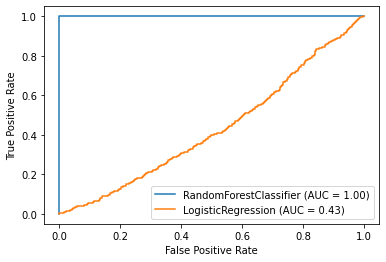

In [179]:
models = [cl_forest, log_reg]
y_skr_log_reg = log_reg.predict(X_test)
y_skrr_cl_forest = cl_forest.predict(X_test)
for i in models:
    ax = plt.gca()
    plot_roc_curve(i, X_test, y_test, ax=ax);

__ё)__ Попробуйте подобрать для логистической регрессии сулу регуляризации `C` по решётке. Какое значение параметра оказалось самым лучшим? Найдите для самого хорошего алгоритма площадь под ROC-кривой на тестовой выборке. Удалось ли побить случайный лес?  

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn import  metrics


log_reg_1 = LogisticRegression()
parameters = {"C": np.linspace(0.1, 2, num=1000)}
clf_grid = GridSearchCV(estimator=log_reg_1, param_grid=parameters, cv=5, n_jobs=-1)
clf_grid.fit(X_test, y_test)
print('Лучший параметр:', clf_grid.best_params_)
print("Площадь под ROC-кривой:\n", metrics.roc_auc_score(y_test, LogisticRegression(C=0.1).fit(X_train, y_train).predict(X_test)))
print("К сожалению, не удалось(")

Лучший параметр: {'C': 0.1}
Площадь под ROC-кривой:
 0.5
К сожалению, не удалось(


__з)__ Своими словами опишите зачем обычно выборку разбивают на тренировочную и тестовую. Объясните что такое кросс-валидация и зачем её придумали. 

1) Разбиение осуществляется для обучения модели, то есть подбор необходимых коэффициентов; и для проверки возможности модели "предсказывать" результат с необходмой точностью 
>
2) Данные делятся на k подмножеств, так что каждый из k подмножеств используется в качестве тестового набора, а другие k-1 подмножества объединяются  в обучающую выборку. После этого результаты усредняются. Таким образом, модель проверяется на устойчивость при изменение обучающихся данных, что позволяет более точно предсказывать желаемый результат.

"А где буква ж?" - спросите вы. Если бы мы выбросили букву ё, никто бы не спросил. А ей, между прочим, тоже обидно!

## Expecto Patronum 3 [40 баллов] (соскучились по мне?)

На страничке https://www.hse.ru/org/persons/ находится информация про сотрудников Вышки. Ваша задача спарсить её. Выберите свою любимую букву алфавита (конечно же такую, что на неё есть сотрудники на сайте). Напишите код, который соберёт все фамилии и имена преподавателей, а потом сохранит эту информацию в табличку формата `.csv`.

In [99]:
import requests
from bs4 import BeautifulSoup
url = "https://www.hse.ru/org/persons/"
response = requests.get(url)

In [101]:
response.status_code

200

In [102]:
tree = BeautifulSoup(response.content)

In [208]:
panel = [i for i in tree.body.find_all("div", {"class": "content__inner content__inner_foot1"})]
names = []
surnames = []
otchestvo = []
for i in panel:
    a = str(i.a.div)[4:].split()
    p = [i for i in tree.body.find_all("div", {"class": "g-pic person-avatar-small2"})]
    names.append(a[0][5:])
    surnames.append(a[1])
    otchestvo.append(a[2][:-1])
print(len(names), len(surnames), len(otchestvo))

441 441 441


In [214]:
infa = pd.DataFrame()
infa["Фамилия"] = surnames
infa["Имя"] = names
infa["Отчество"] = otchestvo
infa

,Фамилия,Имя,Отчество
0,Екатерина,Абалмасова,Сергеевна
1,Ирина,Абанкина,Всеволодовна
2,Татьяна,Абанкина,Всеволодовна
3,Ксения,Абанокова,Руслановна
4,Анна,Абашева,Эдуардовна
...,...,...,...
436,Андрей,Ахременко,Сергеевич
437,Павел,Ахтямов,Ибрагимович
438,Ольга,Ахунова,Леонидовна
439,Лейла,Ашурова,Октамовна


In [215]:
infa.to_csv("Инфа_по_преподавателям.csv", index=False)

### [бонусные 20 баллов] 

Собери всех сотрудников вышке с ФИО, телефонами, должностями и информацией с личных страниц (оброзавание, достижения и тп).

In [280]:
doljn = []
for i in panel:
    doljn.append(i.p.text.replace("\n", " ").replace("\t", " ").split()[0][:-1])

In [286]:
k= [i.get_text().replace("\t", "").replace("\n", "") if i.get_text() else "-" for i in tree.find_all("div", {"class": "l-extra small"})]

In [282]:
infa["Телефон"] = k
infa["Должность"] = doljn
infa

,Фамилия,Имя,Отчество,Телефон,Должность
0,Екатерина,Абалмасова,Сергеевна,"22126,",стажер-исследователь
1,Ирина,Абанкина,Всеволодовна,+7(495) 772-9590 *22073,Профессор
2,Татьяна,Абанкина,Всеволодовна,+7(495) 772-9590 *12036,Директо
3,Ксения,Абанокова,Руслановна,+7(495) 624-6240+7(495) 772-9590,Младши
4,Анна,Абашева,Эдуардовна,23107,Стажер-исследователь
...,...,...,...,...,...
436,Андрей,Ахременко,Сергеевич,NaN,Профессор
437,Павел,Ахтямов,Ибрагимович,NaN,Приглашенны
438,Ольга,Ахунова,Леонидовна,NaN,Профессор
439,Лейла,Ашурова,Октамовна,NaN,Менеджер
